# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Reading and Understanding the Data

In [2]:
data=pd.read_csv("file/Train.csv")

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35


In [4]:
data.shape

(284780, 8)

In [5]:
data.info

<bound method DataFrame.info of         InvoiceNo  StockCode  Description  Quantity          InvoiceDate  \
0            6141       1583          144         3  2011-05-06 16:54:00   
1            6349       1300         3682         6  2011-05-11 07:35:00   
2           16783       2178         1939         4  2011-11-20 13:20:00   
3           16971       2115         2983         1  2011-11-22 12:07:00   
4            6080       1210         2886        12  2011-05-06 09:00:00   
...           ...        ...          ...       ...                  ...   
284775       3408       1706         1081         6  2011-03-01 12:07:00   
284776      13982       2184         2947        16  2011-10-13 15:08:00   
284777       6641        667         3632         4  2011-05-16 12:59:00   
284778      13820       1576         3089        48  2011-10-11 14:18:00   
284779      11042       2603         1156         2  2011-08-22 13:30:00   

        UnitPrice  CustomerID  Country  
0            3

In [6]:
data.describe()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
count,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000
mean,9955.394083,1573.386807,2023.955573,12.028468,3.451216,15288.224278,32.823846
std,5551.519138,843.604991,1089.812078,295.111588,78.399541,1714.336529,6.743602
min,0.000000,0.000000,0.000000,-80995.000000,0.000000,12346.000000,0.000000
25%,5069.000000,939.000000,1141.000000,2.000000,1.250000,13953.000000,35.000000
50%,10310.000000,1521.000000,1987.000000,5.000000,1.950000,15152.000000,35.000000
75%,14657.000000,2106.000000,2945.000000,12.000000,3.750000,16794.000000,35.000000
max,22188.000000,3683.000000,3895.000000,80995.000000,38970.000000,18287.000000,36.000000


# Data Cleaning

In [7]:
## Checking null values in the dataset

data.isnull().sum()*100/data.shape[0]

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

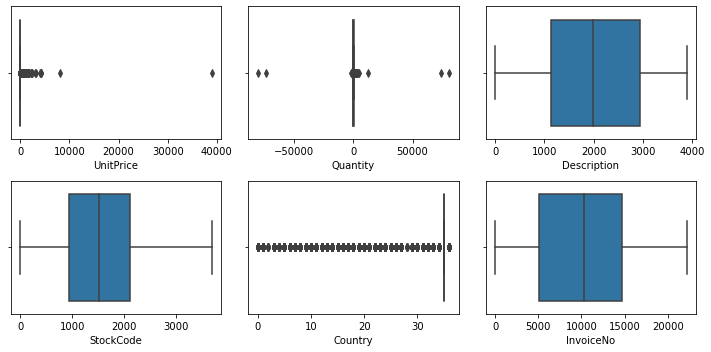

In [8]:
## Outlier Detection

fig,axs=plt.subplots(2,3,figsize=(10,5))
plt1=sns.boxplot(data['UnitPrice'],ax=axs[0,0])
plt2=sns.boxplot(data['Quantity'],ax=axs[0,1])
plt3=sns.boxplot(data['Description'],ax=axs[0,2])
plt1=sns.boxplot(data['StockCode'],ax=axs[1,0])
plt2=sns.boxplot(data['Country'],ax=axs[1,1])
plt3=sns.boxplot(data['InvoiceNo'],ax=axs[1,2])
plt.tight_layout()


In [9]:
## Outlier Treatment for Quantity

Q1 = data.Quantity.quantile(0.25)
Q3 = data.Quantity.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.Quantity <= Q3 + 1.5*IQR)]

In [10]:
## Outlier Treatment for Price

data=data[data.UnitPrice<5000]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fee657249d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fee6572f0d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fee65724670>],
 'medians': [<matplotlib.lines.Line2D at 0x7fee6572f790>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fee6572fa90>],
 'means': []}

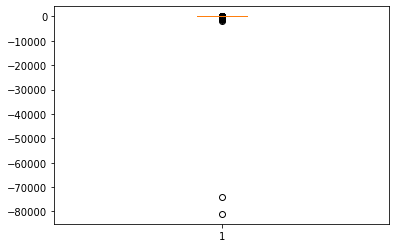

In [11]:
plt.boxplot(data.Quantity)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fee656fde80>,
 'caps': [<matplotlib.lines.Line2D at 0x7fee6568c580>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fee656fdb20>],
 'medians': [<matplotlib.lines.Line2D at 0x7fee6568cc40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fee6568cf40>],
 'means': []}

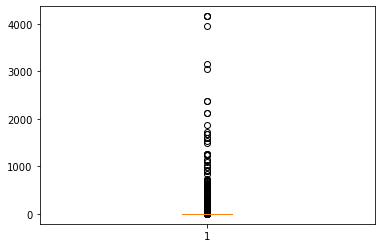

In [12]:
plt.boxplot(data.UnitPrice)

# Visualising Variables

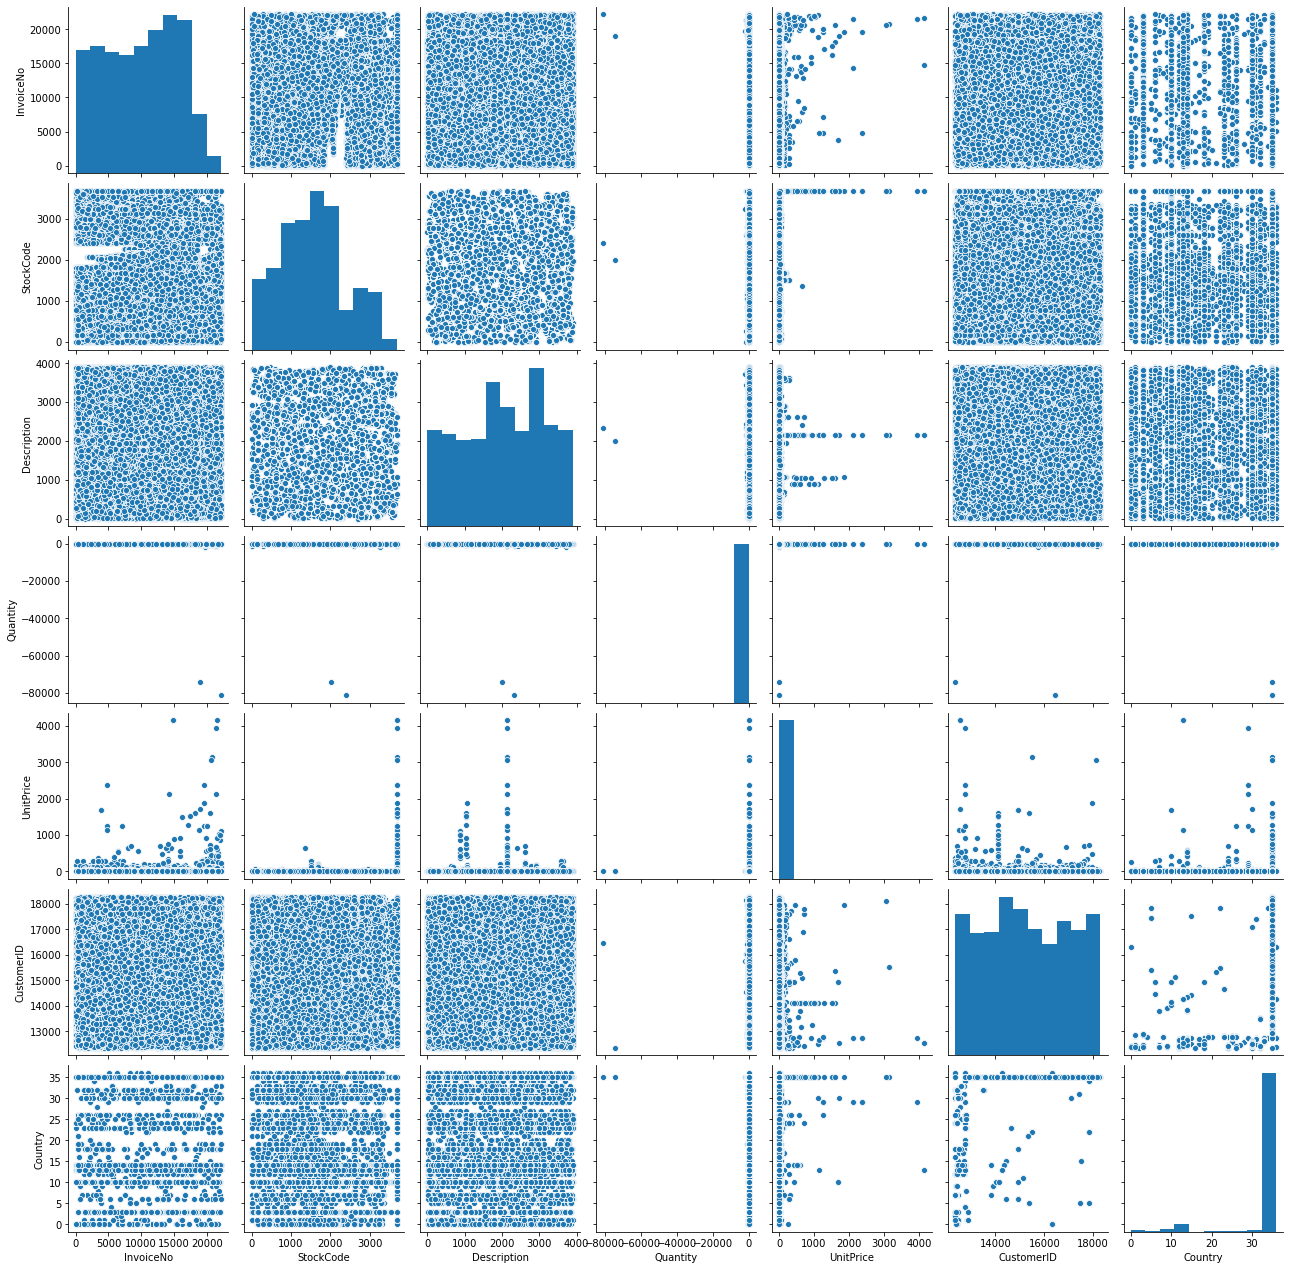

In [13]:
sns.pairplot(data)
plt.show()

# Splitting the Data into Training and Testing Sets

In [14]:
from sklearn.model_selection import train_test_split

df_train,df_test=train_test_split(data,train_size=0.8 ,test_size=0.2,random_state=100)

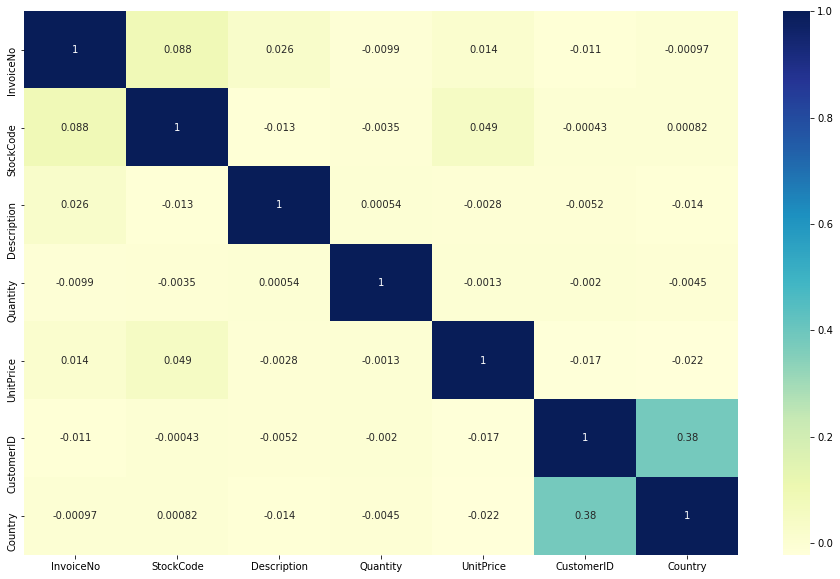

In [15]:
plt.figure(figsize=(16,10))
sns.heatmap(df_train.corr(),annot=True ,cmap="YlGnBu")
plt.show()

# Dividing into X and Y sets for the model building

In [16]:
y_train=df_train.pop('UnitPrice')

## Features selected for model
x_train=df_train[['StockCode','Description','Country']]

In [17]:
x_train.shape

(213484, 3)

In [18]:
y_test=df_test.pop('UnitPrice')

## Features selected for model
x_test=df_test[['StockCode','Description','Country']]

# Model Building

In [19]:
## Linear Regression model
lm=LinearRegression()
lm.fit(x_train,y_train)

## KNeighbors Regressor model
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

## Gradient Boosting Regressor model
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)

## Decision Tree Regressor model
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)



DecisionTreeRegressor()

In [20]:
## Making Prediction 

prediction_lm=lm.predict(x_test)

prediction_knn=knn.predict(x_test)

prediction_gbr=gbr.predict(x_test)

prediction_dtr=dtr.predict(x_test)


# Model Evaluation

In [21]:
print('RMSE_Linear Regression:', np.sqrt(metrics.mean_squared_error(y_test,prediction_lm)))
print('RMSE_KNeighbors Regressor:', np.sqrt(metrics.mean_squared_error(y_test,prediction_knn)))
print('RMSE_Gradient Boosting Regressor :', np.sqrt(metrics.mean_squared_error(y_test,prediction_gbr)))
print('RMSE_Decision Tree:', np.sqrt(metrics.mean_squared_error(y_test,prediction_dtr)))



RMSE_Linear Regression: 16.493841646479563
RMSE_KNeighbors Regressor: 8.923382479967154
RMSE_Gradient Boosting Regressor : 11.340226466471979
RMSE_Decision Tree: 8.658667815212814


In [22]:
from sklearn.metrics import r2_score
print('R2_Linear Regression:' ,r2_score(y_test,prediction_lm))
print('R2_kNeighbors Regressor :' ,r2_score(y_test,prediction_knn))
print('R2_Gradient Boosting Regressor :' ,r2_score(y_test,prediction_gbr))
print('R2_Decision Tree :', r2_score(y_test,prediction_dtr))


R2_Linear Regression: 0.0031729454101803167
R2_kNeighbors Regressor : 0.7082336570011366
R2_Gradient Boosting Regressor : 0.5287844318766153
R2_Decision Tree : 0.7252875563072408


In [23]:
## RMSE from Decision Tree outperform other machine learning algorithms 
## Hence Decision Tree used for making prediction on test data

# Reading and Understanding the Test Data

In [24]:
data_test= pd.read_csv("file/Test.csv")

In [25]:
data_test.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country
0,3139,1709,1079,3,2011-02-22 15:22:00,16161.0,35
1,617,510,3457,1,2010-12-08 12:46:00,17341.0,35
2,14653,604,694,36,2011-10-25 13:53:00,15158.0,35
3,8634,1478,3473,2,2011-06-27 12:38:00,16033.0,35
4,15546,3216,871,1,2011-11-06 16:14:00,15351.0,35


In [26]:
new_data_test=data_test[['StockCode','Description','Country']]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fee615a4ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fee610d7880>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fee615a46d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fee610d7ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fee610d7d00>],
 'means': []}

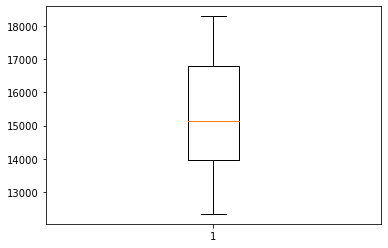

In [27]:
plt.boxplot(data_test.CustomerID)

In [28]:
new_data_test.head()

,StockCode,Description,Country
0,1709,1079,35
1,510,3457,35
2,604,694,35
3,1478,3473,35
4,3216,871,35


In [29]:
new_data_test.describe()

,StockCode,Description,Country
count,122049.000000,122049.000000,122049.000000
mean,1572.955788,2026.412744,32.836795
std,845.106082,1087.697388,6.726816
min,0.000000,0.000000,0.000000
25%,937.000000,1147.000000,35.000000
50%,1523.000000,1987.000000,35.000000
75%,2106.000000,2945.000000,35.000000
max,3683.000000,3895.000000,36.000000


# Prediction on Test Data

In [31]:
prediction_data_test=dtr.predict(new_data_test)

In [32]:
prediction_data_test

array([1.65      , 1.19233333, 3.89443662, ..., 1.3064881 , 3.76578125,
       4.17899225])

In [33]:
results=pd.DataFrame(data=prediction_data_test,columns=["UnitPrice"])
results.head()

,UnitPrice
0,1.650000
1,1.192333
2,3.894437
3,1.648631
4,12.637938


In [34]:
results.shape

(122049, 1)

In [35]:
results.describe()

,UnitPrice
count,122049.000000
mean,3.317555
std,17.181248
min,0.000000
25%,1.250000
50%,1.950000
75%,3.750000
max,1706.047500


In [36]:
results

,UnitPrice
0,1.650000
1,1.192333
2,3.894437
3,1.648631
4,12.637938
...,...
122044,0.380000
122045,1.690000
122046,1.306488
122047,3.765781


In [37]:
results.to_csv("UnitPrice.csv",index=False)